In [1]:
#Imports
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers


C:\Users\Joshua\Anaconda3\envs\SignModel\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('../SignData/train.csv')
labels = train.ix[:,0].values.astype('int32')
X_train = train.ix[:,1:].values.astype('float32')
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = (pd.read_csv('../SignData/test.csv').values).astype('float32')

y_train = np_utils.to_categorical(labels)

C:\Users\Joshua\Anaconda3\envs\SignModel\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


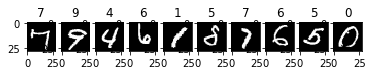

In [3]:
im1 = 120
im2 = 130
for i in range(im1, im2):
    plt.subplot(3,im2-im1,1+(i-im1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(np.where(y_train[i] == 1)[0][0])

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test1 = X_test
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]



In [5]:
def SignsModel(input_shape):
    
    X_input = Input(input_shape)
    print(X_input)
    X = (X_input)
    X = Conv2D(32, (5,5), strides = (1,1), name='conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Dropout(0.2)(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = Dropout(0.2)(X)
    
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    
    print(X.get_shape())
    X = Flatten()(X)
    X = Dense(1024, activation='relu', name='fc')(X)
    X = Dense(512, activation='relu', name='fc2')(X)
    X = Dense(256, activation='relu', name='fc3')(X)
    X = Dense(10, activation='softmax', name='fc4')(X)
    
    model = Model(inputs = X_input, outputs = X, name='SignModel')
    
    return model

In [6]:
signsModel = SignsModel((28,28,1))

Tensor("input_1:0", shape=(?, 28, 28, 1), dtype=float32)
(?, 3, 3, 64)


In [7]:
sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
signsModel.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
signsModel.fit(x=X_train, y=y_train, epochs=150,batch_size=16)

Epoch 1/150
42000/42000 [==============================] - 20s 466us/step - loss: 0.1253 - acc: 0.9627
Epoch 2/150
42000/42000 [==============================] - 18s 420us/step - loss: 0.0516 - acc: 0.9855
Epoch 3/150
42000/42000 [==============================] - 18s 426us/step - loss: 0.0344 - acc: 0.9900
Epoch 4/150
42000/42000 [==============================] - 18s 417us/step - loss: 0.0299 - acc: 0.9909
Epoch 5/150
42000/42000 [==============================] - 18s 417us/step - loss: 0.0234 - acc: 0.9923
Epoch 6/150
42000/42000 [==============================] - 17s 416us/step - loss: 0.0192 - acc: 0.9939
Epoch 7/150
42000/42000 [==============================] - 18s 418us/step - loss: 0.0167 - acc: 0.9948
Epoch 8/150
42000/42000 [==============================] - 17s 417us/step - loss: 0.0152 - acc: 0.9953
Epoch 9/150
42000/42000 [==============================] - 17s 415us/step - loss: 0.0114 - acc: 0.9967
Epoch 10/150
42000/42000 [==============================] - 18s 421us/ste

42000/42000 [==============================] - 18s 420us/step - loss: 8.3954e-04 - acc: 0.9998
Epoch 78/150
42000/42000 [==============================] - 18s 420us/step - loss: 1.8529e-04 - acc: 1.0000
Epoch 79/150
42000/42000 [==============================] - 17s 415us/step - loss: 3.4330e-04 - acc: 0.9999
Epoch 80/150
42000/42000 [==============================] - 18s 421us/step - loss: 3.5682e-04 - acc: 1.0000
Epoch 81/150
42000/42000 [==============================] - 18s 417us/step - loss: 3.4885e-04 - acc: 0.9999
Epoch 82/150
42000/42000 [==============================] - 18s 424us/step - loss: 1.6917e-04 - acc: 1.0000
Epoch 83/150
42000/42000 [==============================] - 18s 419us/step - loss: 1.5045e-04 - acc: 1.0000
Epoch 84/150
42000/42000 [==============================] - 18s 417us/step - loss: 7.9459e-05 - acc: 1.0000
Epoch 85/150
42000/42000 [==============================] - 17s 415us/step - loss: 5.2571e-05 - acc: 1.0000
Epoch 86/150
42000/42000 [===============

In [9]:
print("Generating test predictions...")
print(X_test.shape)
preds = np.argmax(signsModel.predict(X_test,batch_size=16, verbose=0),axis=1)
print(preds)
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-mlp.csv")

Generating test predictions...
(28000, 28, 28, 1)
[2 0 9 ... 3 9 2]


PermissionError: [Errno 13] Permission denied: 'keras-mlp.csv'

In [ ]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [10]:
signsModel.save('signModel.h5')